# My Habits 2021-23: An Exploratory Look

I've collected a pretty large dataset of my habits over the years, from when I first discovered Notion and started my habit tracker in one place. Since then, more than two years have passed and I decided to actually take a look at the data based on what I've learned at University. So, this is just an exploratory look at my habits to actually visualise my habit progress over the years and to see if there are any interesting patterns. 

This is an informal investigation, so I did what I thought was fun, and hope you enjoy taking a look as well. If there's anything else interesting that you pick up, or if you'd like to give me any feedback (always trying to learn!) drop me a note on dc.dianachiang@gmail.com!

## 1. Loading Data, Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from scipy.stats import spearmanr
import scikit_posthocs as sp
from scipy.stats import kruskal
from scipy.stats import levene
from tabulate import tabulate
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pointbiserialr

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Don't want any warnings
warnings.filterwarnings('ignore')

In [3]:
habits = pd.read_csv('HabitTracker_202123.csv')

In [4]:
habits.head()

,Week #,📅 Date,WOFTD,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish
0,3.0,"August 16, 2021",Organisation,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8.0,No
1,3.0,"August 16, 2021",Restart,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7.0,No
2,4.0,"August 17, 2021",Korean BBQ,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,9.0,No
3,NaN,"August 17, 2021",Korean BBQ,No,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,9.0,No
4,4.0,"August 18, 2021",Beliefs,No,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,4.0,No


In [5]:
habits.info()
habits.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week #           884 non-null    float64
 1   📅 Date           887 non-null    object 
 2   WOFTD            854 non-null    object 
 3   🧘🏽‍♀️Meditation  897 non-null    object 
 4   ☀️ 7AM Rise      897 non-null    object 
 5   🌙 7hr+           897 non-null    object 
 6   ✍🏼Journaling     897 non-null    object 
 7   🛼 Exercise       897 non-null    object 
 8   🗼Duo             897 non-null    object 
 9   🇨🇳 Chinese       897 non-null    object 
 10  Walk 🚶🏻‍♀️       897 non-null    object 
 11  🍗 Meat           897 non-null    object 
 12  📘 Reading        897 non-null    object 
 13  🧴 Skincare       897 non-null    object 
 14  Mood /10         847 non-null    float64
 15  Fish             897 non-null    object 
dtypes: float64(2), object(14)
memory usage: 112.2+ KB


(897, 16)

## 2. Cleaning data

### 2.1 Basic Checks - Duplicates, Nulls, Full Weeks

In [6]:
habits.isnull() # Looking for null values


,Week #,📅 Date,WOFTD,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
893,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
894,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
895,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
# Looking at percentage null per column
habits_na_df = ((habits.isna().sum()/len(habits))* 100).reset_index()
habits_na_df.columns = ["Column", "NA%"]
habits_na_df.sort_values(by="NA%", ascending=False, inplace=True)
habits_na_df

,Column,NA%
14,Mood /10,5.574136
2,WOFTD,4.793757
0,Week #,1.449275
1,📅 Date,1.114827
3,🧘🏽‍♀️Meditation,0.000000
4,☀️ 7AM Rise,0.000000
5,🌙 7hr+,0.000000
6,✍🏼Journaling,0.000000
7,🛼 Exercise,0.000000
8,🗼Duo,0.000000


In [8]:
# Removing these nulls
habits = habits.dropna()

In [9]:
# Removing any duplicate rows
duplicates = habits[habits.duplicated('📅 Date', keep=False)]
habits_no_duplicates = habits.drop_duplicates(subset='📅 Date', keep='first')

In [10]:
# Checking if all weeks consist of 7 days - which ones don't
grouped_by_week = habits_no_duplicates.groupby('Week #').size()

invalid_weeks = grouped_by_week[grouped_by_week < 7]

print(invalid_weeks)




Week #
3.0      1
4.0      3
5.0      5
7.0      6
9.0      6
25.0     4
40.0     6
55.0     5
56.0     6
58.0     6
60.0     6
70.0     1
74.0     6
80.0     6
82.0     6
101.0    6
115.0    6
120.0    1
121.0    5
dtype: int64


So that's pretty good then! I am consistency itself. We'll leave the weeks we have fewer data for anyway, but good to know what we're working with. Keeping in mind I've also removed a bunch of null value rows, this looks great!

In [11]:
#checking new length of df
habits_no_duplicates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 879
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week #           840 non-null    float64
 1   📅 Date           840 non-null    object 
 2   WOFTD            840 non-null    object 
 3   🧘🏽‍♀️Meditation  840 non-null    object 
 4   ☀️ 7AM Rise      840 non-null    object 
 5   🌙 7hr+           840 non-null    object 
 6   ✍🏼Journaling     840 non-null    object 
 7   🛼 Exercise       840 non-null    object 
 8   🗼Duo             840 non-null    object 
 9   🇨🇳 Chinese       840 non-null    object 
 10  Walk 🚶🏻‍♀️       840 non-null    object 
 11  🍗 Meat           840 non-null    object 
 12  📘 Reading        840 non-null    object 
 13  🧴 Skincare       840 non-null    object 
 14  Mood /10         840 non-null    float64
 15  Fish             840 non-null    object 
dtypes: float64(2), object(14)
memory usage: 111.6+ KB


### 2.2 Creating new year, month columns for easier future analysis

In [12]:
# Converting to datetime format first
habits_no_duplicates['Date'] = pd.to_datetime(habits_no_duplicates['📅 Date'])


In [13]:
habits_no_duplicates['Month'] = habits_no_duplicates['Date'].dt.month
habits_no_duplicates['Year'] = habits_no_duplicates['Date'].dt.year

print(habits_no_duplicates)


     Week #           📅 Date         WOFTD 🧘🏽‍♀️Meditation ☀️ 7AM Rise 🌙 7hr+  \
0       3.0  August 16, 2021  Organisation              No          No    Yes   
2       4.0  August 17, 2021    Korean BBQ              No          No    Yes   
4       4.0  August 18, 2021       Beliefs              No          No    Yes   
6       4.0  August 19, 2021     Potential              No          No    Yes   
10      5.0  August 23, 2021      Working               No          No    Yes   
..      ...              ...           ...             ...         ...    ...   
875   130.0  January 3, 2024         Percy              No          No    Yes   
876   130.0  January 4, 2024        Early               No          No     No   
877   130.0  January 5, 2024          Pots              No          No    Yes   
878   130.0  January 6, 2024          Emka              No          No    Yes   
879   130.0  January 7, 2024     Christmas              No          No    Yes   

    ✍🏼Journaling 🛼 Exercise

In [14]:
# Checking column names to have them all in one place 
habits_no_duplicates.columns


Index(['Week #', '📅 Date', 'WOFTD', '🧘🏽‍♀️Meditation', '☀️ 7AM Rise', '🌙 7hr+',
       '✍🏼Journaling', '🛼 Exercise', '🗼Duo', '🇨🇳 Chinese', 'Walk 🚶🏻‍♀️',
       '🍗 Meat', '📘 Reading', '🧴 Skincare', 'Mood /10', 'Fish', 'Date',
       'Month', 'Year'],
      dtype='object')

### 2.3 Adding a season column for future analyses

In [15]:
# Dict mapping months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

habits_no_duplicates['Season'] = habits_no_duplicates['Month'].map(month_to_season)
print(habits_no_duplicates)


     Week #           📅 Date         WOFTD 🧘🏽‍♀️Meditation ☀️ 7AM Rise 🌙 7hr+  \
0       3.0  August 16, 2021  Organisation              No          No    Yes   
2       4.0  August 17, 2021    Korean BBQ              No          No    Yes   
4       4.0  August 18, 2021       Beliefs              No          No    Yes   
6       4.0  August 19, 2021     Potential              No          No    Yes   
10      5.0  August 23, 2021      Working               No          No    Yes   
..      ...              ...           ...             ...         ...    ...   
875   130.0  January 3, 2024         Percy              No          No    Yes   
876   130.0  January 4, 2024        Early               No          No     No   
877   130.0  January 5, 2024          Pots              No          No    Yes   
878   130.0  January 6, 2024          Emka              No          No    Yes   
879   130.0  January 7, 2024     Christmas              No          No    Yes   

    ✍🏼Journaling 🛼 Exercise

### 2.4 Separating out datasets into Years

In [16]:
# 2021
habits_2021 = habits_no_duplicates[habits_no_duplicates['Year'] == 2021].copy()
habits_2021 = habits_2021.drop(columns=['Year'])

In [17]:
# 2022
habits_2022 = habits_no_duplicates[habits_no_duplicates['Year'] == 2022].copy()
habits_2022 = habits_2022.drop(columns=['Year'])


In [18]:
# 2023
habits_2023 = habits_no_duplicates[habits_no_duplicates['Year'] == 2023].copy()
habits_2023 = habits_2023.drop(columns=['Year'])


### 2.5 Creating Proportion Datasets

In [19]:
# First getting the proportion of yes for each habit

In [20]:
# Writing out all habit column names for easier processing later

habit_columns  = ['🧴 Skincare',  'Walk 🚶🏻‍♀️', '🌙 7hr+', '🗼Duo', '🍗 Meat', 
                      '📘 Reading', '🇨🇳 Chinese', 
                    '✍🏼Journaling', '🛼 Exercise', '☀️ 7AM Rise', '🧘🏽‍♀️Meditation']

habit_columns_uni  = ['Skincare','Walk','7hr+ Sleep','Duo','Meat', 'Reading', 
                  'Chinese',   'Journaling', 'Exercise','7AM Rise', 'Meditation']

In [21]:
habits_2023.columns


Index(['Week #', '📅 Date', 'WOFTD', '🧘🏽‍♀️Meditation', '☀️ 7AM Rise', '🌙 7hr+',
       '✍🏼Journaling', '🛼 Exercise', '🗼Duo', '🇨🇳 Chinese', 'Walk 🚶🏻‍♀️',
       '🍗 Meat', '📘 Reading', '🧴 Skincare', 'Mood /10', 'Fish', 'Date',
       'Month', 'Season'],
      dtype='object')

In [22]:
# Converting 'Yes' to 1, 'No'/'NaN' to 0
habits_2021.replace({'Yes': 1, 'No': 0, pd.NA: 0}, inplace=True)
habits_2022.replace({'Yes': 1, 'No': 0, pd.NA: 0}, inplace=True)
habits_2023.replace({'Yes': 1, 'No': 0, pd.NA: 0}, inplace=True)


In [23]:
habits_2023

,Week #,📅 Date,WOFTD,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish,Date,Month,Season
508,77.0,"January 1, 2023",Rimma,0,0,1,0,0,0,0,1,1,0,1,9.0,0,2023-01-01,1,Winter
509,78.0,"January 2, 2023",Rabit,0,0,1,0,0,0,0,1,0,0,0,6.0,0,2023-01-02,1,Winter
510,78.0,"January 3, 2023",Loshadki,0,0,1,0,0,0,1,1,0,0,0,7.0,0,2023-01-03,1,Winter
511,78.0,"January 4, 2023",Mugs,0,0,1,0,0,0,0,1,0,0,0,7.0,0,2023-01-04,1,Winter
512,78.0,"January 5, 2023",Outlet,0,0,1,0,0,0,1,1,1,0,0,5.0,0,2023-01-05,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,129.0,"December 27, 2023",Unwelcome,0,1,0,0,0,0,0,1,1,1,1,6.0,1,2023-12-27,12,Winter
869,129.0,"December 28, 2023",Pride,1,1,0,0,1,0,1,1,1,1,1,7.0,1,2023-12-28,12,Winter
870,129.0,"December 29, 2023",Turnaround,0,0,1,0,0,0,0,1,1,0,1,4.0,0,2023-12-29,12,Winter
871,129.0,"December 30, 2023",catto,0,0,1,0,0,0,0,1,1,1,1,7.0,1,2023-12-30,12,Winter


In [24]:
# Creating a function to turn binary yes/no columns into proportion 
def calculate_proportions(df):
    """
    Calculate the proportion of a habit
    """
    # Grouping by month and getting mean 
    proportions = df.groupby('Month').mean()
    
    proportions.reset_index(inplace=True)
    
    return proportions

In [25]:
proportions_2021 = calculate_proportions(habits_2021)
proportions_2022 = calculate_proportions(habits_2022)
proportions_2023 = calculate_proportions(habits_2023)



In [26]:
proportions_2021

,Month,Week #,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish
0,8,4.727273,0.000000,0.181818,0.909091,0.000000,0.636364,0.454545,0.454545,0.909091,0.818182,0.909091,0.909091,7.545455,0.0
1,9,7.928571,0.071429,0.178571,0.857143,0.285714,0.142857,0.500000,0.464286,0.928571,0.714286,0.642857,0.750000,7.892857,0.0
2,10,12.258065,0.000000,0.258065,0.870968,0.193548,0.000000,0.000000,0.032258,0.838710,0.645161,0.193548,0.451613,7.967742,0.0
3,11,16.666667,0.000000,0.366667,0.833333,0.266667,0.233333,0.533333,0.566667,0.766667,0.600000,0.700000,1.000000,7.800000,0.0
4,12,21.000000,0.032258,0.129032,0.806452,0.290323,0.032258,0.870968,0.870968,0.612903,0.483871,0.677419,0.967742,6.354839,0.0


In [27]:
# Making sure these can be used later altogether by evening out the month rows
# Creating empty rows to make sure there are 12 months 
empty_rows = pd.DataFrame(index=range(7), columns=proportions_2021.columns)

proportions_2021 = pd.concat([empty_rows, proportions_2021], ignore_index=True)

In [28]:
# Removing all NAs from this as well
proportions_2021 = proportions_2021.fillna(0)

In [29]:
# And mapping new month names to the month column to make it easier to process later
index_values = {0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July'}  

# Updating the month column 
for index, value in index_values.items():
    if pd.isna(proportions_2021.loc[index, 'Month']) or proportions_2021.loc[index, 'Month'] == 0:
        proportions_2021.loc[index, 'Month'] = value

In [30]:
# Labelling the month columns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

In [31]:
proportions_2021

,Month,Week #,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish
0,January,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,February,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,April,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,May,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,June,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,July,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,8,4.727273,0.000000,0.181818,0.909091,0.000000,0.636364,0.454545,0.454545,0.909091,0.818182,0.909091,0.909091,7.545455,0.0
8,9,7.928571,0.071429,0.178571,0.857143,0.285714,0.142857,0.500000,0.464286,0.928571,0.714286,0.642857,0.750000,7.892857,0.0
9,10,12.258065,0.000000,0.258065,0.870968,0.193548,0.000000,0.000000,0.032258,0.838710,0.645161,0.193548,0.451613,7.967742,0.0


# 3. Exploratory Visualisations 

## 3.1 Order of most consistent habits by year

In [32]:
# Gotta put in the info in the proper format, 
#     so deriving means from df for each habit per year.

yes_percentages_2021 = (habits_2021[habit_columns].sum() / len(habits_2021)) * 100
yes_percentages_2022 = (habits_2022[habit_columns].sum() / len(habits_2022)) * 100
yes_percentages_2023 = (habits_2023[habit_columns].sum() / len(habits_2023)) * 100

<Figure size 3200x2400 with 0 Axes>

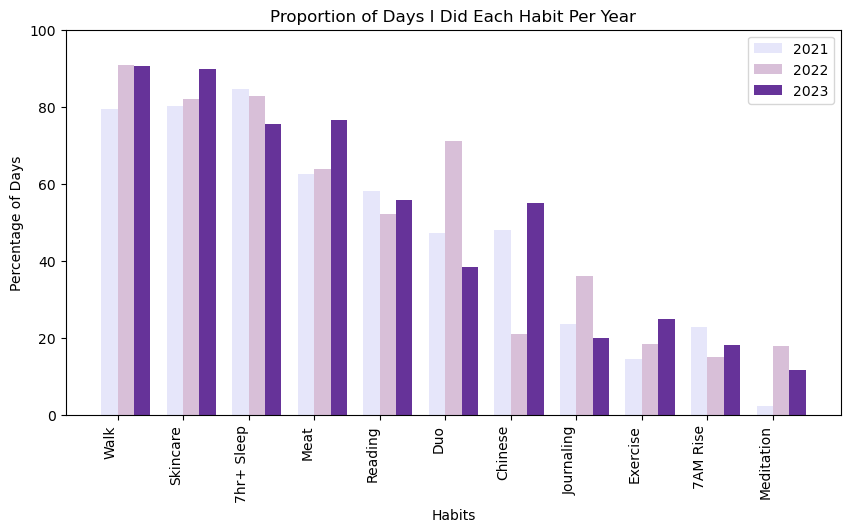

In [33]:
# Plotting now
# Combining habit names and percentages 
combined_data = []
for i in range(len(habit_columns_uni)):
    combined_data.append((habit_columns_uni[i], yes_percentages_2021[i] + yes_percentages_2022[i] + yes_percentages_2023[i]))

# Sorting by combined percentages
sorted_combined_data = sorted(combined_data, key=lambda x: x[1], reverse=True)

# Unpacking
sorted_habit_columns_uni, sorted_combined_percentages = zip(*sorted_combined_data)

# Custom bits
bar_width = 0.25
plt.figure(dpi=500)

fig, ax = plt.subplots(figsize=(10, 5))

# Extracting sorted percentages per year
sorted_yes_percentages_2021 = [yes_percentages_2021[habit_columns_uni.index(habit)] for habit in sorted_habit_columns_uni]
sorted_yes_percentages_2022 = [yes_percentages_2022[habit_columns_uni.index(habit)] for habit in sorted_habit_columns_uni]
sorted_yes_percentages_2023 = [yes_percentages_2023[habit_columns_uni.index(habit)] for habit in sorted_habit_columns_uni]

# 2021
bar1 = ax.bar(np.arange(len(sorted_habit_columns_uni)), sorted_yes_percentages_2021, width=bar_width, color='lavender', label='2021')

# 2022
bar2 = ax.bar(np.arange(len(sorted_habit_columns_uni)) + bar_width, sorted_yes_percentages_2022, width=bar_width, color='Thistle', label='2022')

# 2023
bar3 = ax.bar(np.arange(len(sorted_habit_columns_uni)) + bar_width*2, sorted_yes_percentages_2023, width=bar_width, color='rebeccapurple', label='2023')

# Plotting 
plt.xticks(np.arange(len(sorted_habit_columns_uni)) + bar_width / 2, sorted_habit_columns_uni, rotation=90, ha='right')
plt.xlabel("Habits")
plt.ylabel("Percentage of Days")
plt.ylim(top=100)
plt.title("Proportion of Days I Did Each Habit Per Year")
ax.legend()

plt.show()

I didn't start tracking all of the habits included at the same time, so some are at 0.

## 3.2 Visualising how often I did each habit per season 

In [34]:
# List of seasons and years to process
seasons = ['Winter', 'Summer', 'Spring', 'Fall']
years = [2022, 2023]

separated_habits = {}
seasonal_percentages = {}

# Function to calculate percentages of how often each habit was completed
def calculate_yes_percentages(habits_df, habit_columns):
        return habits_df[habit_columns].mean() * 100

In [38]:
# Looping through seasons and years
for year in years:
    df = globals()[f'habits_{year}']
    
    for season in seasons:
        # Droping the 'Season' column
        df_season = df[df['Season'] == season].copy().drop(columns=['Season'])
        
        # Saving the dataframe in the dict
        key = f'habits_{year}_{season.lower()}'
        separated_habits[key] = df_season
        
        # Appliing func and storing percentages
        seasonal_percentages[key] = calculate_yes_percentages(df_season, habit_columns)

In [39]:
# Unpacking for compatibility
for key, value in separated_habits.items():
    globals()[key] = value  # Unpacking DataFrame vars for seasons
for key, value in seasonal_percentages.items():
    globals()[f"{key}_prop"] = value  # Unpacking percentage vars like props

# Reordering unicode cols to match normal ones
habit_columns_uni = [habit_columns_uni[habit_columns.index(habit)] for habit in habit_columns]

# Checking if all is well
print("habit_columns:", habit_columns)
print("habit_columns_uni:", habit_columns_uni)

habit_columns: ['🧴 Skincare', 'Walk 🚶🏻\u200d♀️', '🌙 7hr+', '🗼Duo', '🍗 Meat', '📘 Reading', '🇨🇳 Chinese', '✍🏼Journaling', '🛼 Exercise', '☀️ 7AM Rise', '🧘🏽\u200d♀️Meditation']
habit_columns_uni: ['Skincare', 'Walk', '7hr+ Sleep', 'Duo', 'Meat', 'Reading', 'Chinese', 'Journaling', 'Exercise', '7AM Rise', 'Meditation']


<Figure size 3200x2400 with 0 Axes>

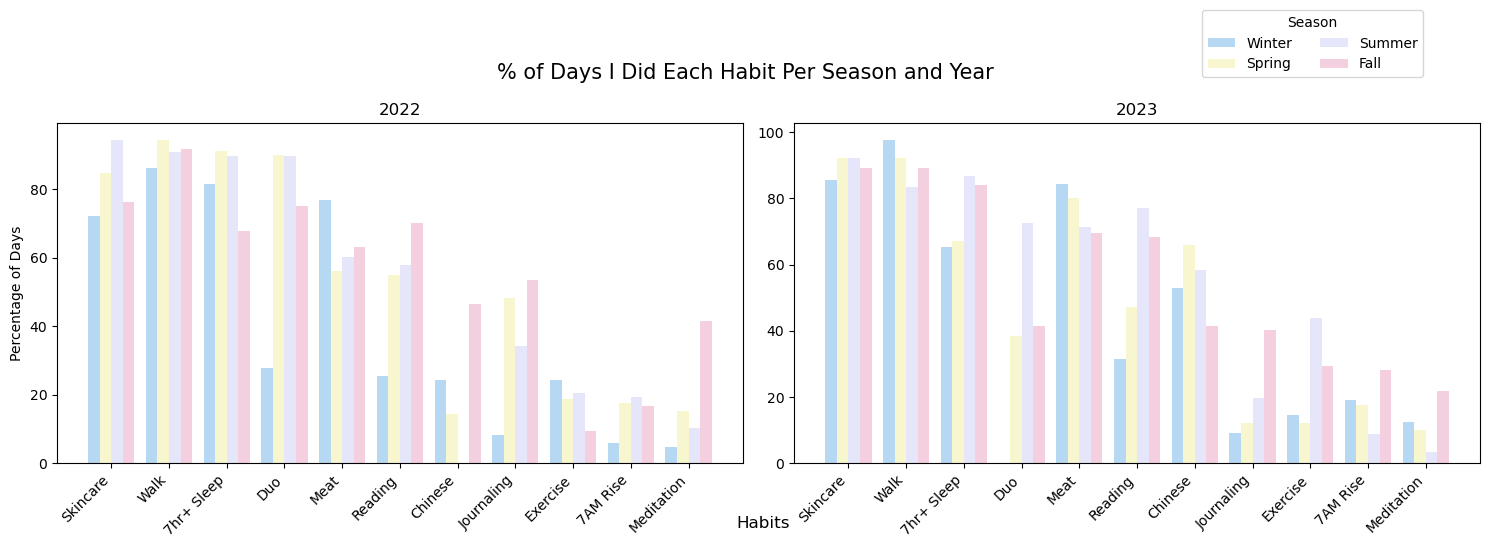

In [40]:
# Customizing
plt.figure(dpi=500)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Define the width of each bar
bar_width = 0.2

# 2022
x = np.arange(len(habit_columns))  # The positions of the bars

# Create grouped bars for each season (Winter, Spring, Summer, Fall)
axs[0].bar(x - 1.5*bar_width, habits_2022_winter_prop, color='#B6D8F2', width=bar_width, label='Winter')
axs[0].bar(x - 0.5*bar_width, habits_2022_spring_prop, color='#F7F6CF', width=bar_width, label='Spring')
axs[0].bar(x + 0.5*bar_width, habits_2022_summer_prop, color='lavender', width=bar_width, label='Summer')
axs[0].bar(x + 1.5*bar_width, habits_2022_fall_prop, color='#F4CFDF', width=bar_width, label='Fall')

# Customizing 2022
axs[0].set_xticks(x)
axs[0].set_xticklabels(habit_columns_uni, rotation=45, ha='right')
axs[0].set_ylabel("Percentage of Days")
axs[0].set_title("2022")
axs[0].grid(False)

# 2023
# Create grouped bars for each season (Winter, Spring, Summer, Fall)
axs[1].bar(x - 1.5*bar_width, habits_2023_winter_prop, color='#B6D8F2', width=bar_width, label='Winter')
axs[1].bar(x - 0.5*bar_width, habits_2023_spring_prop, color='#F7F6CF', width=bar_width, label='Spring')
axs[1].bar(x + 0.5*bar_width, habits_2023_summer_prop, color='lavender', width=bar_width, label='Summer')
axs[1].bar(x + 1.5*bar_width, habits_2023_fall_prop, color='#F4CFDF', width=bar_width, label='Fall')

# Customizing 2023
axs[1].set_xticks(x)
axs[1].set_xticklabels(habit_columns_uni, rotation=45, ha='right')
axs[1].set_title("2023")
axs[1].grid(False)

fig.suptitle("% of Days I Did Each Habit Per Season and Year", fontsize=15)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.8, 1.1), ncol=2, title='Season')

plt.tight_layout()

fig.text(0.512, 0.05, 'Habits', ha='center', fontsize=12)

plt.show()

<Figure size 3200x2400 with 0 Axes>

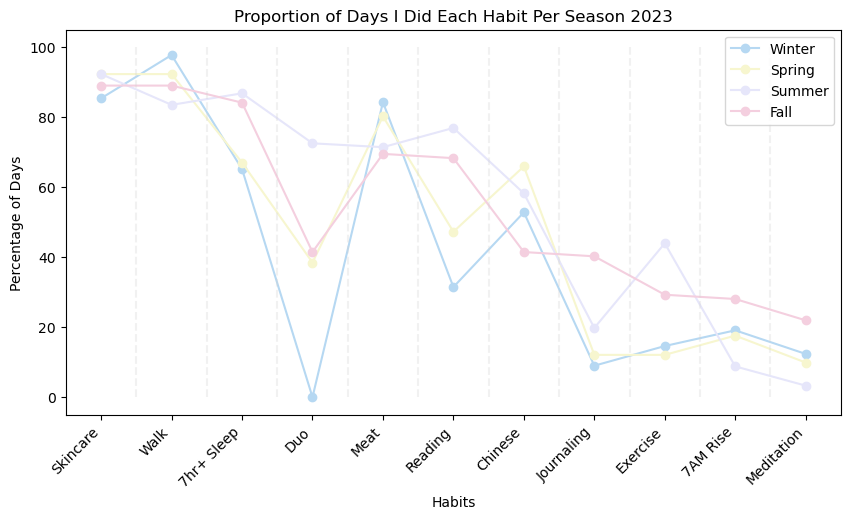

In [43]:
# Repeating the above for 2023
# Customizing
plt.figure(dpi=500)
fig, ax = plt.subplots(figsize=(10, 5))

# Lines
line1, = ax.plot(np.arange(len(habit_columns)), habits_2023_winter_prop, marker='o', linestyle='-', color='#B6D8F2', label='Winter')

line2, = ax.plot(np.arange(len(habit_columns)), habits_2023_spring_prop, marker='o', linestyle='-', color='#F7F6CF', label='Spring')

line3, = ax.plot(np.arange(len(habit_columns)), habits_2023_summer_prop, marker='o', linestyle='-', color='lavender', label='Summer')

line4, = ax.plot(np.arange(len(habit_columns)), habits_2023_fall_prop, marker='o', linestyle='-', color='#F4CFDF', label='Fall')

# Vertical lines 
for i in range(len(habit_columns) -1):
    ax.vlines(x=i + 0.5, ymin=0, ymax=100, color='lightgray', linestyle='--', alpha=0.3)
    
# Customizing
plt.xticks(np.arange(len(habit_columns)), habit_columns_uni, rotation=45, ha='right')
plt.xlabel("Habits")
plt.ylabel("Percentage of Days")
plt.title("Proportion of Days I Did Each Habit Per Season 2023")

ax.legend()

ax.grid(False)


plt.show()

<Figure size 3200x2400 with 0 Axes>

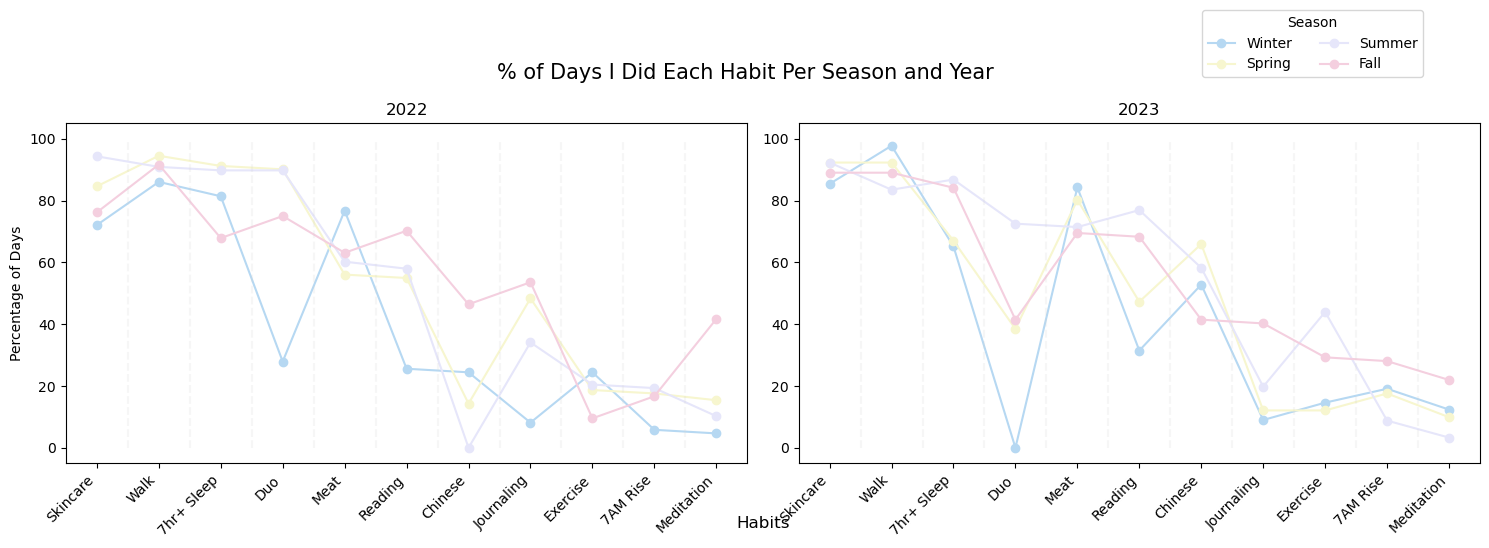

In [44]:
# Now plotting the two together for comparison
# Customizing
plt.figure(dpi=500)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 2022
axs[0].plot(np.arange(len(habit_columns)), habits_2022_winter_prop, marker='o', linestyle='-', color='#B6D8F2', label='Winter')
axs[0].plot(np.arange(len(habit_columns)), habits_2022_spring_prop, marker='o', linestyle='-', color='#F7F6CF', label='Spring')
axs[0].plot(np.arange(len(habit_columns)), habits_2022_summer_prop, marker='o', linestyle='-', color='lavender', label='Summer')
axs[0].plot(np.arange(len(habit_columns)), habits_2022_fall_prop, marker='o', linestyle='-', color='#F4CFDF', label='Fall')

# Vertical lines 
for i in range(len(habit_columns) - 1):
    axs[0].vlines(x=i + 0.5, ymin=0, ymax=100, color='lightgray', linestyle='--', alpha=0.2)

# Customizing
axs[0].set_xticks(np.arange(len(habit_columns)))
axs[0].set_xticklabels(habit_columns_uni, rotation=45, ha='right')
axs[0].set_ylabel("Percentage of Days")
axs[0].set_title("2022")
axs[0].grid(False)

# Plot for 2023
axs[1].plot(np.arange(len(habit_columns)), habits_2023_winter_prop, marker='o', linestyle='-', color='#B6D8F2', label='Winter')
axs[1].plot(np.arange(len(habit_columns)), habits_2023_spring_prop, marker='o', linestyle='-', color='#F7F6CF', label='Spring')
axs[1].plot(np.arange(len(habit_columns)), habits_2023_summer_prop, marker='o', linestyle='-', color='lavender', label='Summer')
axs[1].plot(np.arange(len(habit_columns)), habits_2023_fall_prop, marker='o', linestyle='-', color='#F4CFDF', label='Fall')

    
# Vertical lines 
for i in range(len(habit_columns) - 1):
   axs[1].vlines(x=i + 0.5, ymin=0, ymax=100, color='lightgray', linestyle='--', alpha=0.2)

# Customizing
axs[1].set_xticks(np.arange(len(habit_columns)))
axs[1].set_xticklabels(habit_columns_uni, rotation=45, ha='right')
axs[1].set_title("2023")
axs[1].grid(False)


# Top of the grid
fig.suptitle("% of Days I Did Each Habit Per Season and Year", fontsize=15)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.8, 1.1), ncol=2, title = 'Season')


plt.tight_layout()

fig.text(0.512, 0.05, 'Habits', ha='center', fontsize=12)

plt.show()

Okay, well looks like my duolingo streak heavily plummeted in 2023, mainly because I started really using other methods more, and also due to the change in language I studied - making a switch from French to Mandarin learning. You can also see how that's correlated to me starting to pick up more mandarin through apps like 'Chineseasy' and 'Pleco'.

Curiously, I've done less reading during the winter times in both years, which also makes sense since I tend to prioritise spending time with family and friends during the festive season more, so have less time for reading.

I did do less journalling in 2023 compared to 2022, something that I do think I should get around to improving next year (in 2025). I did notice a difference doing it versus not doing it as much. Curiously, I also did less of this in winters compared to other seasons. It might be because it tends to be colder in the winter months, and I am less keen to get out of bed earlier during these months to journal.

## 3.3 Looking at How Often I Did Habits 

### 3.32 One habit per month per year - Trial using 'Reading' habit

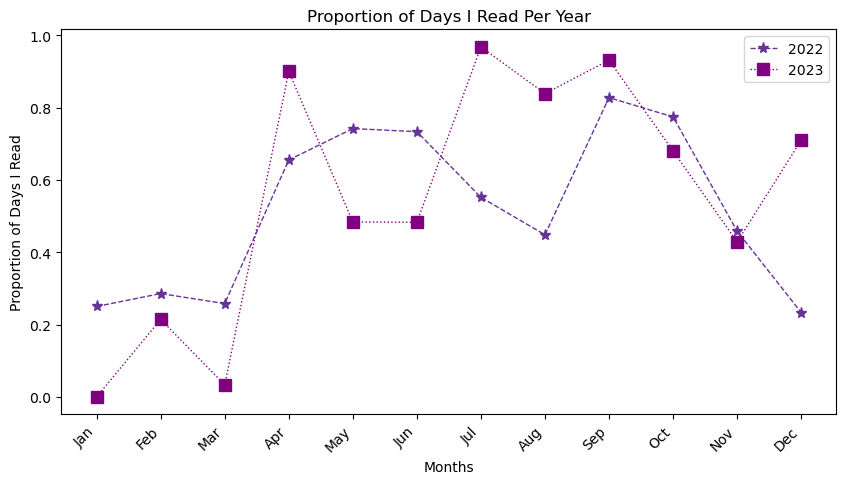

In [45]:
# Plotting just reading for now 
fig, ax = plt.subplots(figsize=(10, 5))

#line1, = ax.plot(proportions_2021['Month'], proportions_2021['📘 Reading'], marker='o', color='Thistle', linestyle='-', markersize=8, linewidth=1, label='2021')
line2, = ax.plot(proportions_2022['Month'], proportions_2022['📘 Reading'], marker='*', color='rebeccapurple', linestyle='--', markersize=8, linewidth=1, label='2022')
line3, = ax.plot(proportions_2023['Month'], proportions_2023['📘 Reading'], marker='s', color='Purple', linestyle=':', markersize=8, linewidth=1, label='2023')

# Customiing
plt.xticks(proportions_2022['Month'], months, rotation=45, ha='right')
plt.xlabel("Months")
plt.ylabel("Proportion of Days I Read")
plt.title("Proportion of Days I Read Per Year")

ax.legend()

plt.show()

In [46]:
proportions_2021

,Month,Week #,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish
0,January,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,February,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,April,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,May,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,June,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,July,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,8,4.727273,0.000000,0.181818,0.909091,0.000000,0.636364,0.454545,0.454545,0.909091,0.818182,0.909091,0.909091,7.545455,0.0
8,9,7.928571,0.071429,0.178571,0.857143,0.285714,0.142857,0.500000,0.464286,0.928571,0.714286,0.642857,0.750000,7.892857,0.0
9,10,12.258065,0.000000,0.258065,0.870968,0.193548,0.000000,0.000000,0.032258,0.838710,0.645161,0.193548,0.451613,7.967742,0.0


In [47]:
proportions_2022

,Month,Week #,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish
0,1,25.500000,0.035714,0.035714,0.892857,0.142857,0.464286,0.500000,0.357143,0.678571,0.785714,0.250000,0.964286,6.571429,0.0
1,2,30.642857,0.107143,0.142857,0.857143,0.071429,0.178571,0.285714,0.035714,0.928571,0.785714,0.285714,0.928571,7.071429,0.0
2,3,34.870968,0.193548,0.161290,0.903226,0.451613,0.193548,0.774194,0.225806,0.967742,0.516129,0.258065,0.838710,7.612903,0.0
3,4,39.172414,0.137931,0.241379,0.931034,0.551724,0.137931,0.931034,0.137931,0.931034,0.620690,0.655172,0.896552,7.344828,0.0
4,5,43.645161,0.129032,0.129032,0.903226,0.451613,0.225806,1.000000,0.064516,0.935484,0.548387,0.741935,0.806452,7.032258,0.0
5,6,48.933333,0.133333,0.233333,0.900000,0.366667,0.200000,1.000000,0.000000,0.966667,0.566667,0.733333,0.966667,7.133333,0.0
6,7,53.137931,0.103448,0.241379,0.965517,0.241379,0.379310,0.896552,0.000000,0.931034,0.655172,0.551724,0.931034,7.034483,0.0
7,8,57.793103,0.068966,0.103448,0.827586,0.413793,0.034483,0.793103,0.000000,0.827586,0.586207,0.448276,0.931034,6.793103,0.0
8,9,62.137931,0.206897,0.034483,0.793103,0.379310,0.172414,0.931034,0.310345,0.862069,0.793103,0.827586,0.896552,6.448276,0.0
9,10,66.419355,0.709677,0.290323,0.774194,0.774194,0.064516,0.870968,0.709677,0.967742,0.580645,0.774194,0.838710,7.225806,0.0


I think I prefer the line plot over the bar plot for this type of data. The patterns and connections over time are seen easier. 

I find it interesting how in 2022 my habits tended to slide downwards during holiday breaks, around August and December, whereas in 2023 they tended to increase during these periods instead. I think this is because I felt I had more time in 2023 to do my habits, whereas in 2022 I was completing my undergraduate degree and wished to take advantage of the holidays to relax and replenish myself.

### 3.33 Visualising how frequently I did each habit over the months per year

In [48]:
habit_columns_new  = ['🧴 Skincare',  'Walk 🚶🏻‍♀️', '🌙 7hr+', '🗼Duo', '🍗 Meat', 
                      '📘 Reading', '🇨🇳 Chinese',  
                    '✍🏼Journaling', '🛼 Exercise','☀️ 7AM Rise', '🧘🏽‍♀️Meditation']

In [49]:
# Putting the above visualisations all in one grid
def plot_proportions_bar(ax, column_name, proportions_2021, proportions_2022, proportions_2023, months, show_xlabel=True):
    bar_width = 0.25

    # 2021
    bar1 = ax.bar(np.arange(len(months)), proportions_2021[column_name], width=bar_width, color='Thistle', label='2021', edgecolor = 'white')

    # 2022
    bar2 = ax.bar(np.arange(len(months)) + bar_width, proportions_2022[column_name], width=bar_width, color='rebeccapurple', label='2022', edgecolor = 'white')

    # 2023
    bar3 = ax.bar(np.arange(len(months)) + 2*bar_width, proportions_2023[column_name], width=bar_width, color='Purple', label='2023', edgecolor = 'white')

    # Customizing
    ax.set_xticks(np.arange(len(months)) + bar_width)
    ax.set_xticklabels(months, rotation=45, ha='right')
    ax.set_ylabel(f"{habit_columns_uni[habit_columns_new.index(column_name)]}")

    ax.set_ylim(0, 1)

    ax.legend().remove()
    
    if not show_xlabel:
        ax.set_xticklabels([])

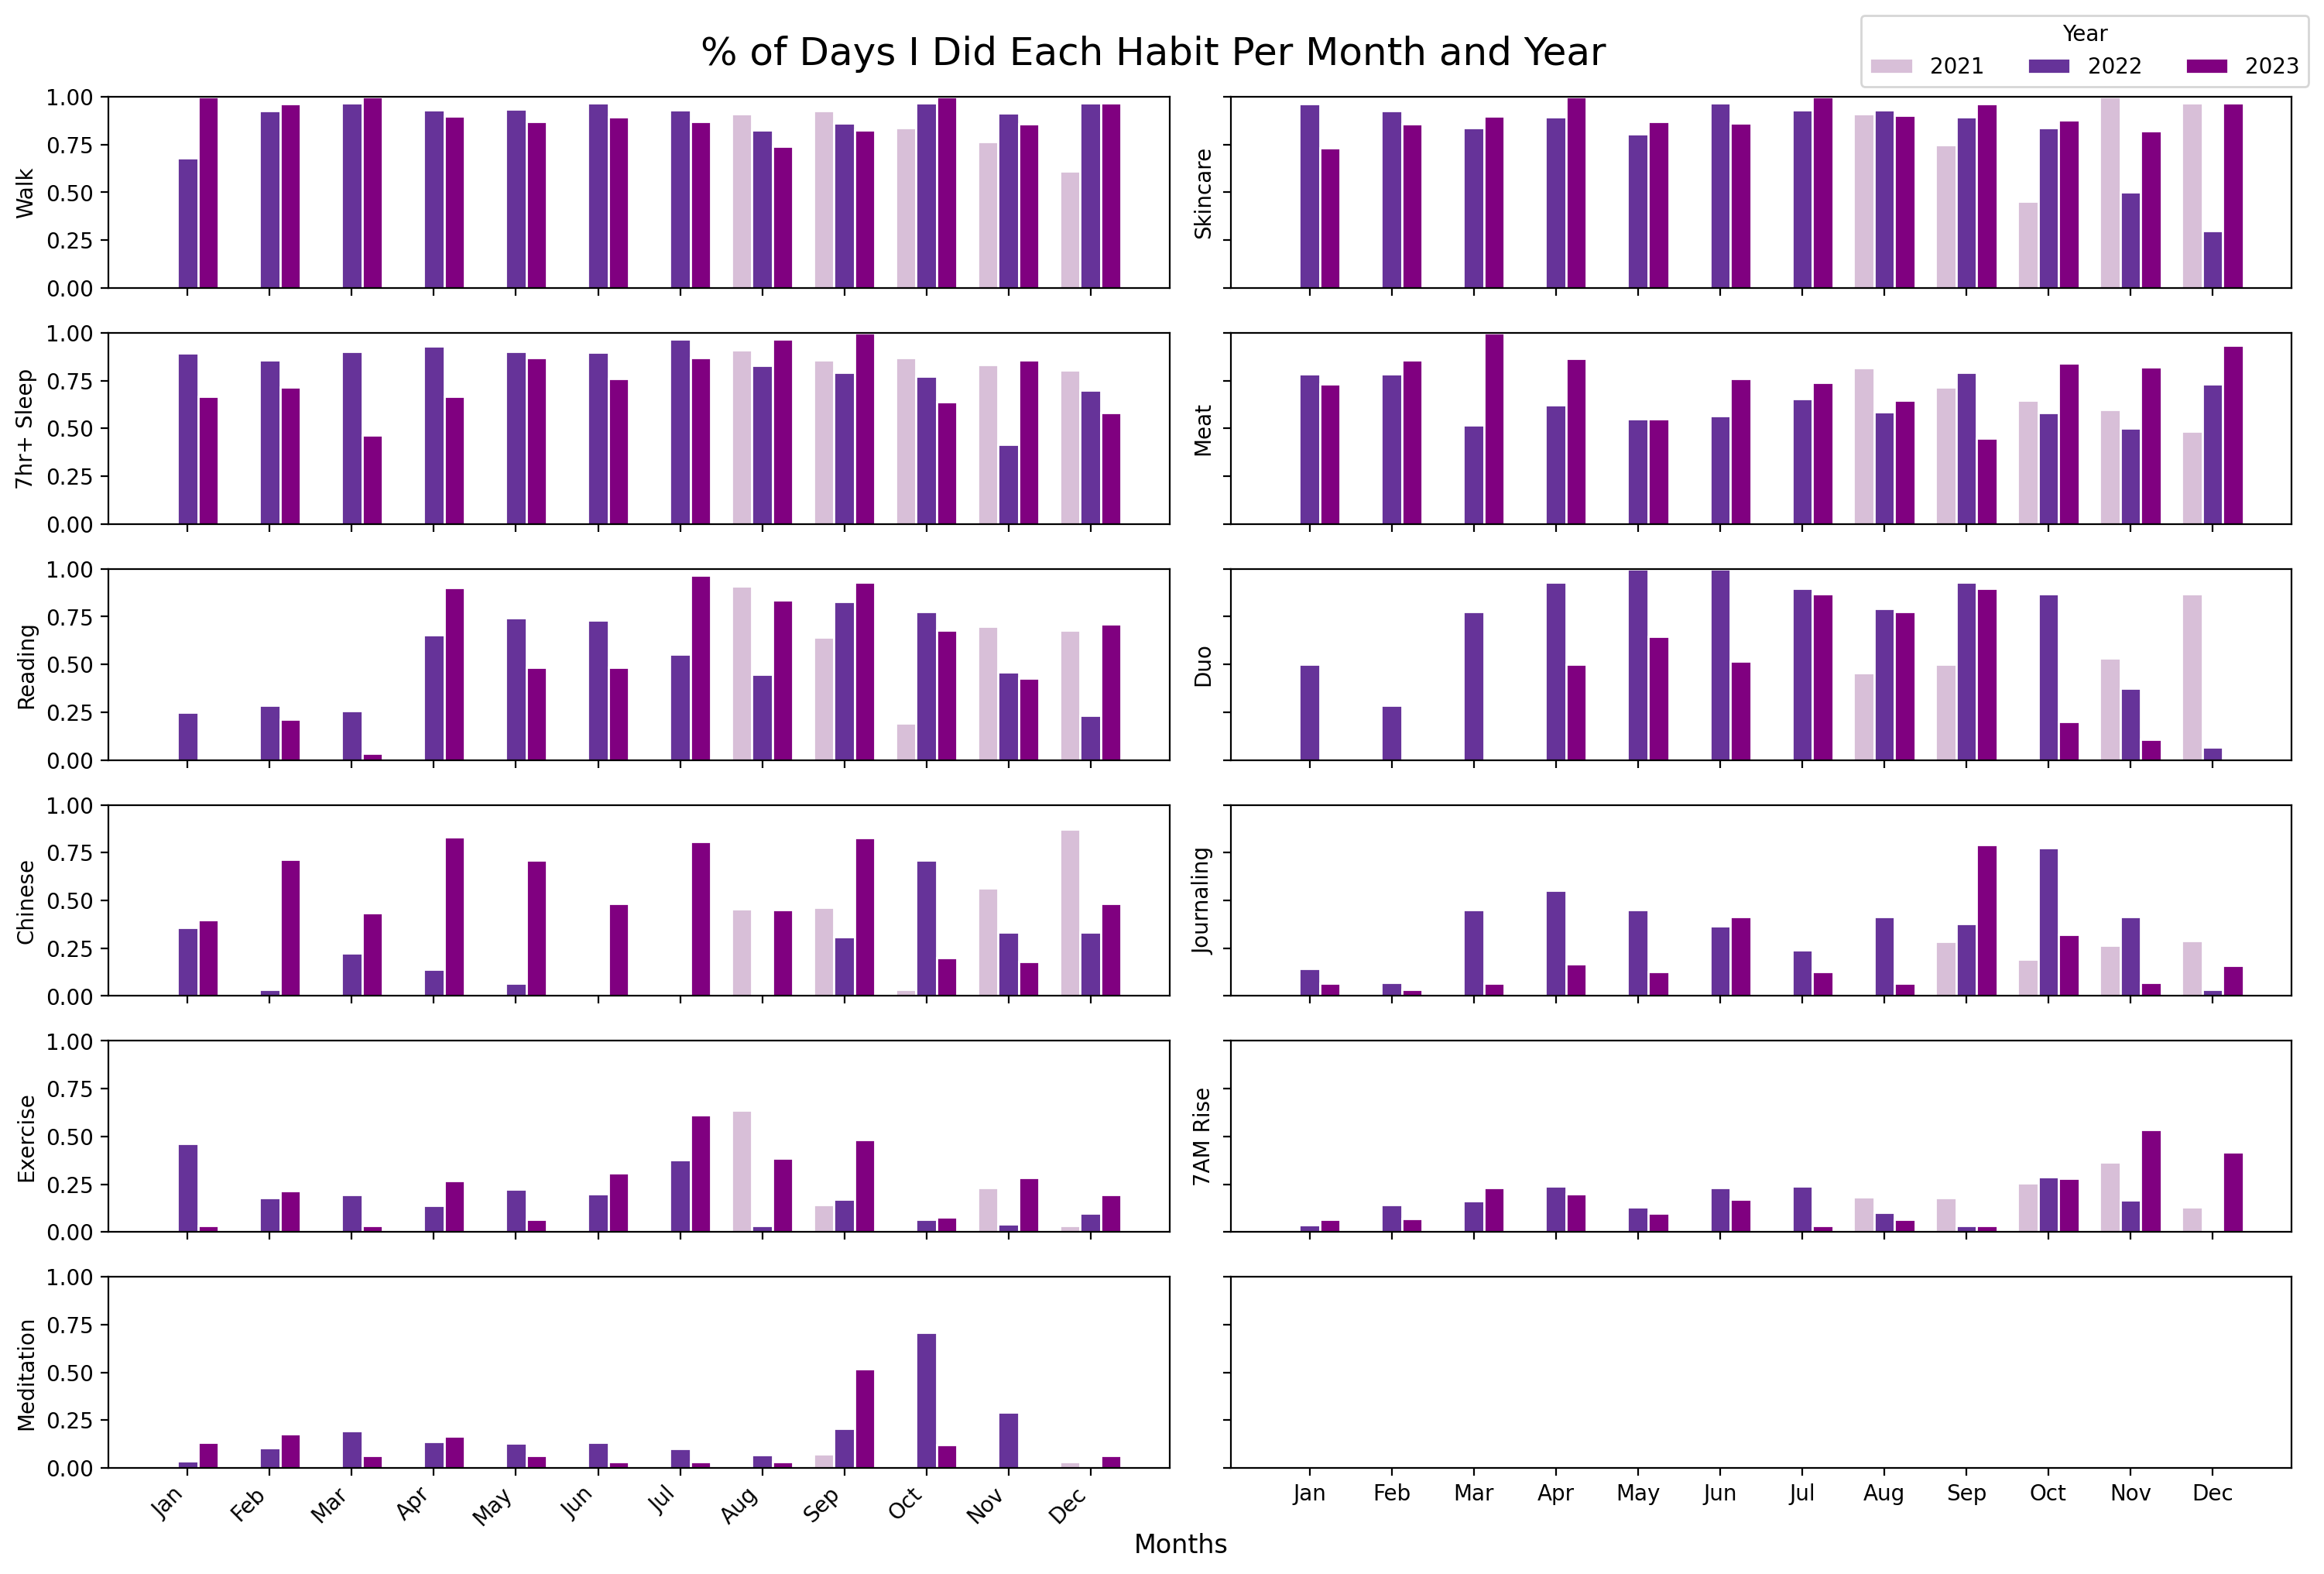

In [50]:
# Getting total props
total_proportions = {}
for column_name in habit_columns_new:
    total_proportions[column_name] = sum(proportions_2021[column_name]) + sum(proportions_2022[column_name]) + sum(proportions_2023[column_name])

# Sorting cols 
habit_columns_new_sorted = sorted(habit_columns_new, key=lambda x: total_proportions[x], reverse=True)

fig, axs = plt.subplots(6, 2, dpi = 200, figsize=(15, 10), sharex=True, sharey=True)
axs = axs.flatten()  

# Looping
for i, column_name in enumerate(habit_columns_new_sorted):
    show_xlabel = i >= len(habit_columns_new_sorted) - 2  # Show x-axis label only for the bottom two plots
    plot_proportions_bar(axs[i], column_name, proportions_2021, proportions_2022, proportions_2023, months)


fig.suptitle("% of Days I Did Each Habit Per Month and Year", fontsize=18)

plt.subplots_adjust(top=0.9)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.8, 1), ncol=3, title="Year")

fig.text(0.512, 0, 'Months', ha='center', fontsize=12)

plt.tight_layout()


plt.show()

# 4. Comparing Moods Across The Years / Months

### 4.1 Line Plots

In [51]:
# Sorting out data into the right format.

# Adding year columns to the new mood dfs
habits_mood_2021 = habits_no_duplicates[habits_no_duplicates['Year']==2021]
habits_mood_2022 = habits_no_duplicates[habits_no_duplicates['Year']==2022]
habits_mood_2023 = habits_no_duplicates[habits_no_duplicates['Year']==2023]

In [52]:
# Getting the mean of my mood per month
habits_mood_2021_avg = habits_mood_2021.groupby(['Month'])['Mood /10'].mean()
habits_mood_2022_avg = habits_mood_2022.groupby(['Month'])['Mood /10'].mean()
habits_mood_2023_avg = habits_mood_2023.groupby(['Month'])['Mood /10'].mean()

In [53]:
# Adding a new col for the month numbers
proportions_2022['Month_Number'] = [4,8,12,2,1,7,6,3,5,11,10,9]

In [54]:
proportions_2022

,Month,Week #,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish,Month_Number
0,1,25.500000,0.035714,0.035714,0.892857,0.142857,0.464286,0.500000,0.357143,0.678571,0.785714,0.250000,0.964286,6.571429,0.0,4
1,2,30.642857,0.107143,0.142857,0.857143,0.071429,0.178571,0.285714,0.035714,0.928571,0.785714,0.285714,0.928571,7.071429,0.0,8
2,3,34.870968,0.193548,0.161290,0.903226,0.451613,0.193548,0.774194,0.225806,0.967742,0.516129,0.258065,0.838710,7.612903,0.0,12
3,4,39.172414,0.137931,0.241379,0.931034,0.551724,0.137931,0.931034,0.137931,0.931034,0.620690,0.655172,0.896552,7.344828,0.0,2
4,5,43.645161,0.129032,0.129032,0.903226,0.451613,0.225806,1.000000,0.064516,0.935484,0.548387,0.741935,0.806452,7.032258,0.0,1
5,6,48.933333,0.133333,0.233333,0.900000,0.366667,0.200000,1.000000,0.000000,0.966667,0.566667,0.733333,0.966667,7.133333,0.0,7
6,7,53.137931,0.103448,0.241379,0.965517,0.241379,0.379310,0.896552,0.000000,0.931034,0.655172,0.551724,0.931034,7.034483,0.0,6
7,8,57.793103,0.068966,0.103448,0.827586,0.413793,0.034483,0.793103,0.000000,0.827586,0.586207,0.448276,0.931034,6.793103,0.0,3
8,9,62.137931,0.206897,0.034483,0.793103,0.379310,0.172414,0.931034,0.310345,0.862069,0.793103,0.827586,0.896552,6.448276,0.0,5
9,10,66.419355,0.709677,0.290323,0.774194,0.774194,0.064516,0.870968,0.709677,0.967742,0.580645,0.774194,0.838710,7.225806,0.0,11


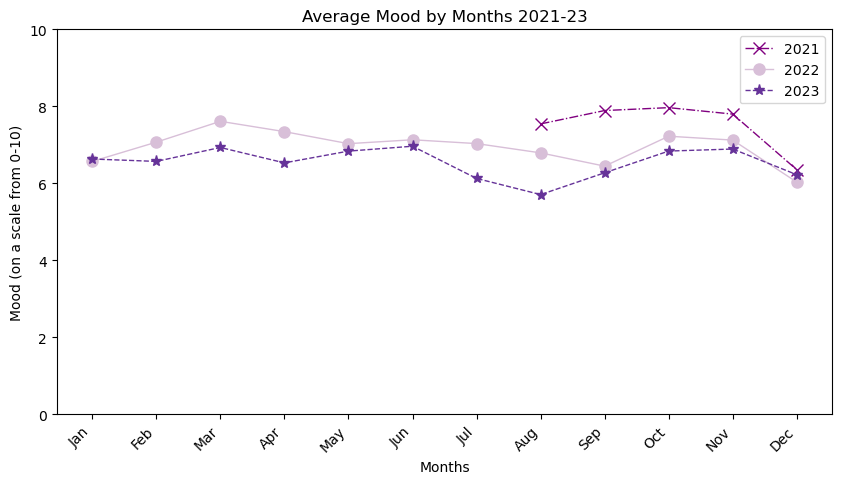

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

line1, = ax.plot(habits_mood_2021_avg,marker='x', color='Purple', linestyle='-.', markersize=8, linewidth=1, label='2021')
line2, = ax.plot(habits_mood_2022_avg,marker='o', color='Thistle', linestyle='-', markersize=8, linewidth=1, label='2022')
line3, = ax.plot(habits_mood_2023_avg, marker='*', color='rebeccapurple', linestyle='--', markersize=8, linewidth=1, label='2023')

# Customizing
plt.xticks(proportions_2022['Month'], months, rotation=45, ha='right')
plt.xlabel("Months")
plt.ylabel("Mood (on a scale from 0-10)")
plt.title("Average Mood by Months 2021-23")

ax.legend()

ax.set_ylim(0, 10)

plt.show()


Looks like the lines are pretty close together, so there's not much difference in my mood across the years. That said, I seem to have a better mood in 2021 and 2022 than 2023. 

Let's zoom in to see the difference better

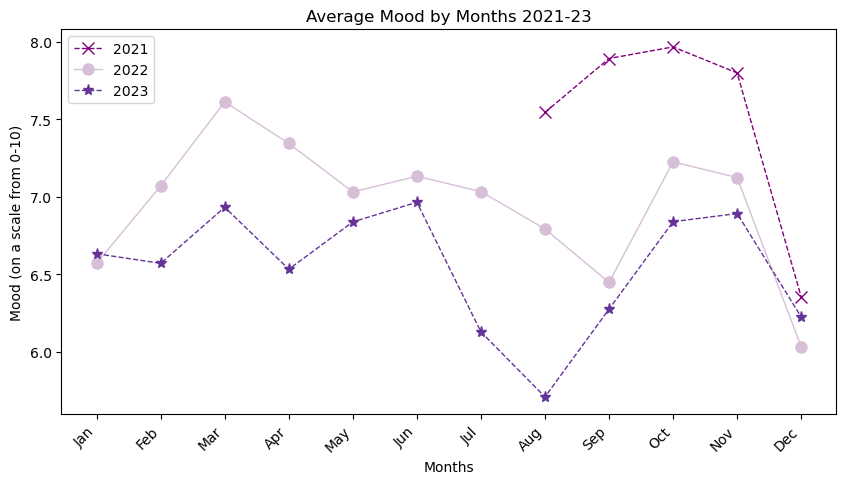

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))

line1, = ax.plot(habits_mood_2021_avg,marker='x', color='Purple', linestyle='--', markersize=8, linewidth=1, label='2021')
line2, = ax.plot(habits_mood_2022_avg,marker='o', color='Thistle', linestyle='-', markersize=8, linewidth=1, label='2022')
line3, = ax.plot(habits_mood_2023_avg, marker='*', color='rebeccapurple', linestyle='--', markersize=8, linewidth=1, label='2023')


# Customizing
plt.xticks(proportions_2022['Month'], months, rotation=45, ha='right')
plt.xlabel("Months")
plt.ylabel("Mood (on a scale from 0-10)")
plt.title("Average Mood by Months 2021-23")

ax.legend()

plt.show()



Okay, so now the difference is more clearly seen but need to remember that the y scale has been zoomed in on, which is hard to do in this plot.

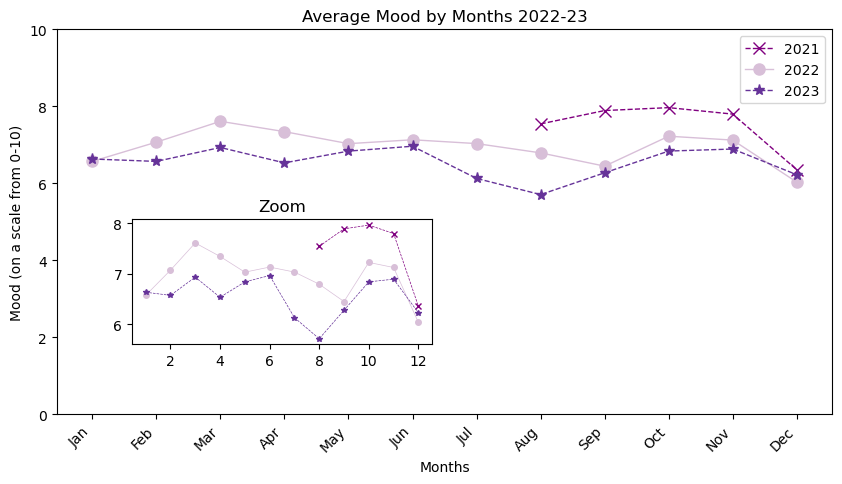

In [57]:
# Big plot 
fig, ax = plt.subplots(figsize=(10, 5))
line1, = ax.plot(habits_mood_2021_avg,marker='x', color='Purple', linestyle='--', markersize=8, linewidth=1, label='2021')
line2, = ax.plot(habits_mood_2022_avg, marker='o', color='Thistle', linestyle='-', markersize=8, linewidth=1, label='2022')
line3, = ax.plot(habits_mood_2023_avg, marker='*', color='rebeccapurple', linestyle='--', markersize=8, linewidth=1, label='2023')

# Customizing plot A
plt.xlabel("Months")
plt.ylabel("Mood (on a scale from 0-10)")
plt.title("Average Mood by Months 2022-23")
ax.legend()
ax.set_ylim(0, 10)
plt.xticks(proportions_2022['Month'], months, rotation=45, ha='right')

# Inset axes in A
ax_inset = fig.add_axes([0.2, 0.25, 0.3, 0.25])  # Adjust the position and size of the inset axes as needed

# Plot B
ax_inset.plot(habits_mood_2021_avg, marker='x', color='Purple', linestyle='--', markersize=4, linewidth=0.5)
ax_inset.plot(habits_mood_2022_avg, marker='o', color='Thistle', linestyle='-', markersize=4, linewidth=0.5)
ax_inset.plot(habits_mood_2023_avg, marker='*', color='rebeccapurple', linestyle='--', markersize=4, linewidth=0.5)

ax_inset.set_title("Zoom")

plt.show()

Woo! Much better. 

Now, really looking at it, across all three years I do seem to feel worse in December. It might be because I am away in a different country either from family or friends during the festive season, and I tend to miss people more during a season I associate with 'togetherness'.

Now, let's see if my mood differs significantly between the seasons, and if I'm another victim of the colder seasons and shorter days.

### 4.2 Mood Between Seasons

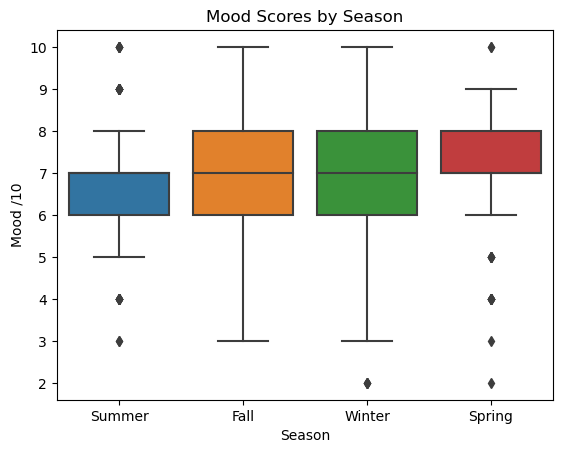

In [58]:
# Boxplot to visualize mood distribution by season
sns.boxplot(x='Season', y='Mood /10', data=habits_no_duplicates)
plt.title('Mood Scores by Season')
plt.show()

In [59]:
habits_no_duplicates.groupby("Season")["Mood /10"].mean().reset_index()

,Season,Mood /10
0,Fall,7.176471
1,Spring,7.049451
2,Summer,6.668421
3,Winter,6.492958


In [60]:
habits_no_duplicates.groupby("Season")["Mood /10"].median().reset_index()

,Season,Mood /10
0,Fall,7.0
1,Spring,7.0
2,Summer,7.0
3,Winter,7.0


In [61]:
habits_no_duplicates.groupby("Season")["Mood /10"].std().reset_index()

,Season,Mood /10
0,Fall,1.387598
1,Spring,1.280010
2,Summer,1.406919
3,Winter,1.684053


Let's see if there's a significant difference statistically between seasons. but just before I can do this, I need to run the assumptions for the ANOVA test.

In [62]:
# Getting residuals 
habits_no_duplicates['group_mean'] = habits_no_duplicates.groupby('Season')['Mood /10'].transform('mean')
habits_no_duplicates['residuals'] = habits_no_duplicates['Mood /10'] - habits_no_duplicates['group_mean']

In [63]:
shapiro_test = shapiro(habits_no_duplicates['residuals'])
print(f"Shapiro-Wilk Test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test statistic: 0.9831615686416626, p-value: 2.99821429905478e-08


Okay so the assumption of normality is violated, so we can't run an ANOVA for this.

This means we gotta use a non-parametric test, like the Kruskal-Wallis. 

In [64]:
# Quickly creating new columns for this test for the whole df
winter_mood = df[df['Season'] == 'Winter']['Mood /10']
spring_mood = df[df['Season'] == 'Spring']['Mood /10']
summer_mood = df[df['Season'] == 'Summer']['Mood /10']
fall_mood = df[df['Season'] == 'Fall']['Mood /10']

In [65]:
# Let's first test for the KW assumption if there are similar distributions across groups
levene_test = levene(winter_mood, spring_mood, summer_mood, fall_mood)
print(f"Levene’s Test statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")

Levene’s Test statistic: 2.6013474264287577, p-value: 0.0519552689688063


Okay, so the assumption of similar distributions across groups is met, as the p-value is not below the 0.05 threshold, though it is close. So we can now run the test.

In [66]:
# Kruskal-Wallis test
kruskal_test = kruskal(winter_mood, spring_mood, summer_mood, fall_mood)
print(f"Kruskal-Wallis statistic: {kruskal_test.statistic}, p-value: {kruskal_test.pvalue}")

Kruskal-Wallis statistic: 11.484861436673617, p-value: 0.009373208273637433


Okay so the KW test is significant, suggesting that there is a difference between seasons. now let's follow that up with a non-parametric post hoc test.

In [67]:
# Dunn’s test, for which my assumptions have already been met. 
dunn_results = sp.posthoc_dunn(habits_no_duplicates, val_col='Mood /10', group_col='Season', p_adjust='bonferroni')
print(dunn_results)

            Fall    Spring    Summer    Winter
Fall    1.000000  1.000000  0.000193  0.000010
Spring  1.000000  1.000000  0.004479  0.000511
Summer  0.000193  0.004479  1.000000  1.000000
Winter  0.000010  0.000511  1.000000  1.000000


Okay, so it seems that there's a significant difference between Winter & Fall, and Winter & Spring. 
Summer and Spring also have a significant difference in mood ratings between them, as does Summer and Fall.

So there is a difference between the two 'lighter and warmer' seasons and 'colder and darker' seasons. But based on what the boxplot looked like and the descriptive statistics, I do tend to have a more stable higher mood in the warmer months, and more variability during the colder months, with the lowest mood tending to occur in Winter. So yes, I tend to be affected by the winter sad bug. Honestly, I'm not surprised. 

Curiously, I tend to have the most variability in Winter and Summer, which I think could be related to these months being holiday months, and therefore a departure from routine and exposure to a broader range of experiences. 

### 4.3 Heatmap of Mood By Day By Year

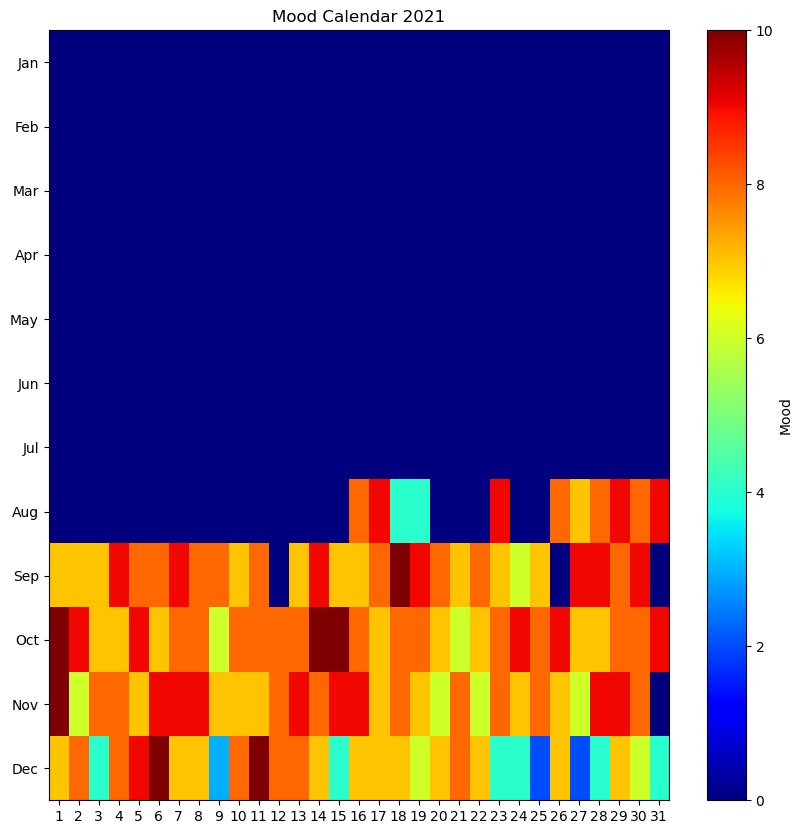

In [68]:
heatmap_data = np.zeros((12, 31))

# Filling array with mood values based on date
for _, row in habits_2021.iterrows():
    month = row['Date'].month - 1  
    day = row['Date'].day - 1 
    mood = row['Mood /10']
    heatmap_data[month, day] = mood


fig, ax = plt.subplots(figsize=(10, 10))

#Even though I like my pastels and purples, they do make it hard to see data differences as easily, 
# especially on a plot where color variation is the information. 
# So, for these heat maps I'm using the jet colorscheme. It's more friendly for color blind people too!
cax = ax.imshow(heatmap_data, cmap='jet', vmin=0, vmax=10, aspect='auto', interpolation='none')

# Setting X-axis and y-axis labels
ax.set_xticks(np.arange(0, 31, 1))
ax.set_xticklabels(np.arange(1, 32, 1))
ax.set_yticks(np.arange(0, 12, 1))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Colorbar creation
cbar = fig.colorbar(cax)
cbar.set_label('Mood')

plt.title('Mood Calendar 2021')
plt.show()

Given that I only started tracking data on myself in the end of 2021, I don't have data for a lot of rectangles on this plot.  Nevertheless, I can see I tend to be happier in the first half of the month, I wonder if it's because the feeling of newness is stronger, kind of the "fresh start effect" coming through. Alternatively it could be related to monthly hormone cycles - you do tend to feel better at certain phases more than others. 

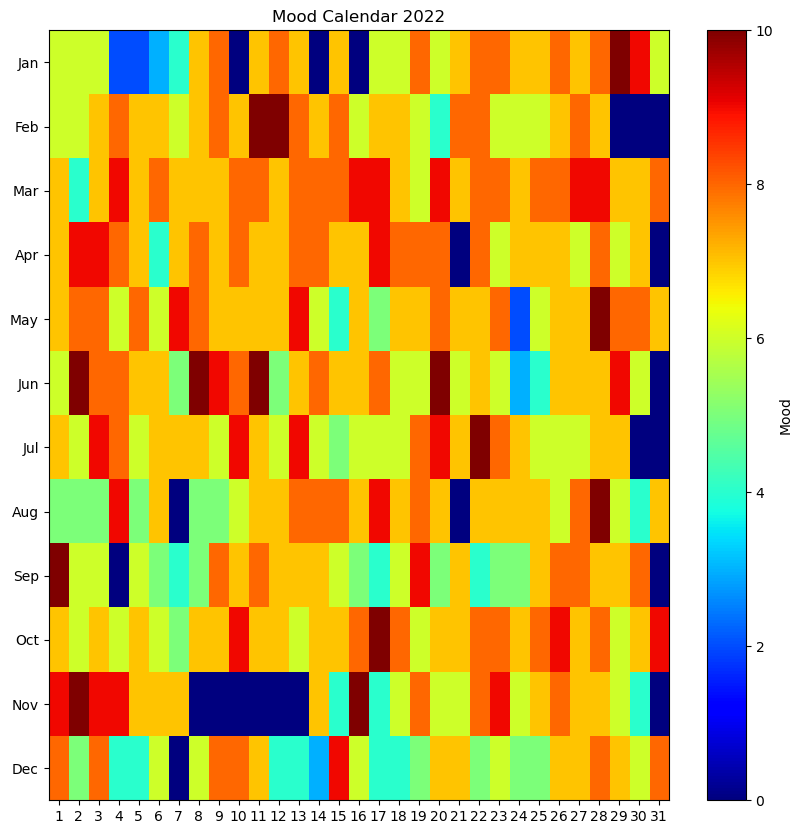

In [69]:
# Repeating the same thing for 2022 

heatmap_data = np.zeros((12, 31))

# Filling array with mood values based on date
for _, row in habits_2022.iterrows():
    month = row['Date'].month - 1 
    day = row['Date'].day - 1  
    mood = row['Mood /10']
    heatmap_data[month, day] = mood

fig, ax = plt.subplots(figsize=(10, 10))

cax = ax.imshow(heatmap_data, cmap='jet', vmin=0, vmax=10, aspect='auto', interpolation='none')

# Setting X-axis and y-axis labels
ax.set_xticks(np.arange(0, 31, 1))
ax.set_xticklabels(np.arange(1, 32, 1))
ax.set_yticks(np.arange(0, 12, 1))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Colorbar creation
cbar = fig.colorbar(cax)
cbar.set_label('Mood')

plt.title('Mood Calendar 2022')
plt.show()

Not much more I can pick up on in 2022, except reinforcing the idea that I tend to feel better in the start of every month.

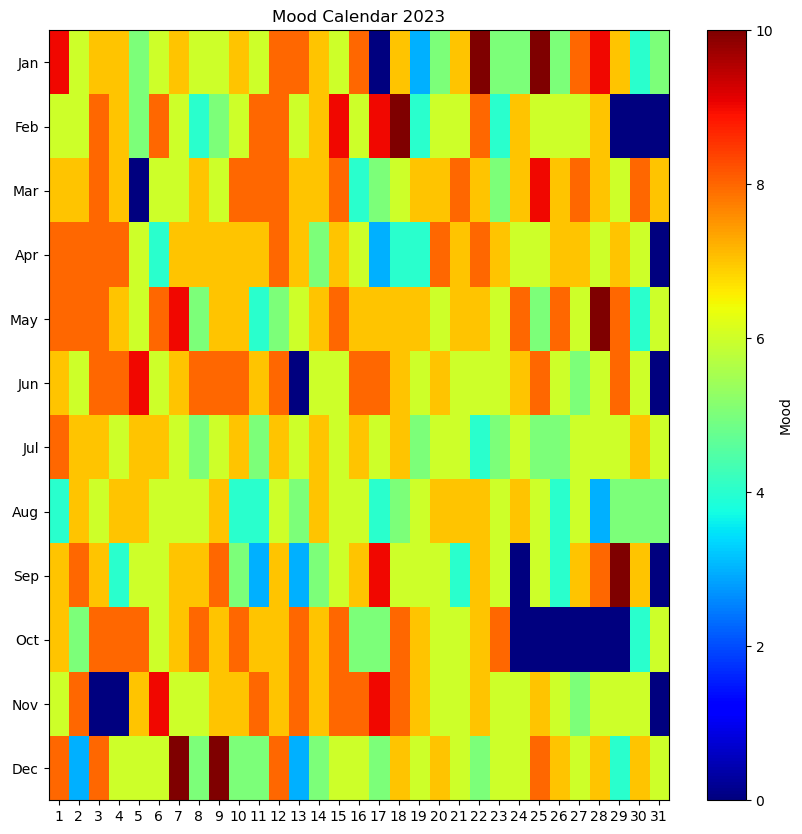

In [70]:
# And now 2023

heatmap_data = np.zeros((12, 31))

# Filling array with mood values based on date
for _, row in habits_2023.iterrows():
    month = row['Date'].month - 1  
    day = row['Date'].day - 1
    mood = row['Mood /10']
    heatmap_data[month, day] = mood

fig, ax = plt.subplots(figsize=(10, 10))

cax = ax.imshow(heatmap_data, cmap='jet', vmin=0, vmax=10, aspect='auto', interpolation='none')

# Setting X-axis and y-axis labels
ax.set_xticks(np.arange(0, 31, 1))
ax.set_xticklabels(np.arange(1, 32, 1))
ax.set_yticks(np.arange(0, 12, 1))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Colorbar creation
cbar = fig.colorbar(cax)
cbar.set_label('Mood')

plt.title('Mood Calendar 2023')
plt.show()

Okay, so visually I'm pretty convinced this is a pattern, but let's check if that's actually correct. 

### 4.4 Checking if I Really Do Feel Better in the First Half of the Month

Hypothesising that I tend to be in a better mood at the first half of each month compared to the second half of the month.

To do this, because I'm just interested in first half vs last half of the month, I can code each day as being in part 0 or part 1, and then run a repeated-measures or dependent t-test. It would have to be repeated measures since each month's halves are of course related to one another, and also, I'm the only person supplying the data. 

For this type of analysis I would need each month to be one row and the means across each month's first and second halves as two columns.

#### 4.4.1 Formattng data for analysis

In [71]:
# Assigning 'First' or 'Second' halves to each of the rows for each years' dataset

habits_2021['📅 Date'] = pd.to_datetime(habits_2021['📅 Date'])
habits_2021['Month Half'] = habits_2021['📅 Date'].apply(lambda x: 'First' if x.day <= 15 else 'Second')

habits_2022['📅 Date'] = pd.to_datetime(habits_2022['📅 Date'])
habits_2022['Month Half'] = habits_2022['📅 Date'].apply(lambda x: 'First' if x.day <= 15 else 'Second')

habits_2023['📅 Date'] = pd.to_datetime(habits_2023['📅 Date'])
habits_2023['Month Half'] = habits_2023['📅 Date'].apply(lambda x: 'First' if x.day <= 15 else 'Second')

In [72]:
habits_2021.columns

Index(['Week #', '📅 Date', 'WOFTD', '🧘🏽‍♀️Meditation', '☀️ 7AM Rise', '🌙 7hr+',
       '✍🏼Journaling', '🛼 Exercise', '🗼Duo', '🇨🇳 Chinese', 'Walk 🚶🏻‍♀️',
       '🍗 Meat', '📘 Reading', '🧴 Skincare', 'Mood /10', 'Fish', 'Date',
       'Month', 'Season', 'Month Half'],
      dtype='object')

In [73]:
habits_2021.head()

,Week #,📅 Date,WOFTD,🧘🏽‍♀️Meditation,☀️ 7AM Rise,🌙 7hr+,✍🏼Journaling,🛼 Exercise,🗼Duo,🇨🇳 Chinese,Walk 🚶🏻‍♀️,🍗 Meat,📘 Reading,🧴 Skincare,Mood /10,Fish,Date,Month,Season,Month Half
0,3.0,2021-08-16,Organisation,0,0,1,0,1,1,1,1,1,1,1,8.0,0,2021-08-16,8,Summer,Second
2,4.0,2021-08-17,Korean BBQ,0,0,1,0,1,1,1,1,1,1,1,9.0,0,2021-08-17,8,Summer,Second
4,4.0,2021-08-18,Beliefs,0,0,1,0,0,1,1,1,0,1,1,4.0,0,2021-08-18,8,Summer,Second
6,4.0,2021-08-19,Potential,0,0,1,0,0,1,1,0,1,1,0,4.0,0,2021-08-19,8,Summer,Second
10,5.0,2021-08-23,Working,0,0,1,0,1,1,1,1,1,1,1,9.0,0,2021-08-23,8,Summer,Second


In [74]:
# Mood 2021
habits_2021['Month'] = habits_2021['📅 Date'].dt.strftime('%B')

# Grouping by month and calculating the mean mood in each half 
grouped = habits_2021.groupby(['Month', 'Month Half'])['Mood /10'].mean().unstack()


Mood_2021 = grouped.reset_index().rename_axis(None, axis=1)
Mood_2021.columns = ['Month', 'First Half', 'Second Half']

Mood_2021['Year'] = 2021

print(Mood_2021)

       Month  First Half  Second Half  Year
0     August         NaN     7.545455  2021
1   December    7.200000     5.562500  2021
2   November    8.066667     7.533333  2021
3    October    8.200000     7.750000  2021
4  September    7.785714     8.000000  2021


Since I've only got data starting from 16th of August 2021, which is the entirety of the second half but not first half of the month, I'm deleting this month from the data I'm working with.

In [75]:
Mood_2021 = Mood_2021.drop(index=Mood_2021.index[0])
print(Mood_2021)

       Month  First Half  Second Half  Year
1   December    7.200000     5.562500  2021
2   November    8.066667     7.533333  2021
3    October    8.200000     7.750000  2021
4  September    7.785714     8.000000  2021


In [76]:
# Mood 2022
habits_2022['Month'] = habits_2022['📅 Date'].dt.strftime('%B')

# Grouping by month and calculating the mean mood in each half 
grouped = habits_2022.groupby(['Month', 'Month Half'])['Mood /10'].mean().unstack()


Mood_2022 = grouped.reset_index().rename_axis(None, axis=1)
Mood_2022.columns = ['Month', 'First Half', 'Second Half']

Mood_2022['Year'] = 2022

print(Mood_2022)

        Month  First Half  Second Half  Year
0       April    7.400000     7.285714  2022
1      August    6.428571     7.133333  2022
2    December    6.000000     6.062500  2022
3    February    7.466667     6.615385  2022
4     January    5.615385     7.400000  2022
5        July    7.000000     7.071429  2022
6        June    7.666667     6.600000  2022
7       March    7.333333     7.875000  2022
8         May    7.133333     6.937500  2022
9    November    7.666667     6.800000  2022
10    October    6.733333     7.687500  2022
11  September    6.571429     6.333333  2022


In [77]:
# Mood 2023
habits_2023['Month'] = habits_2023['📅 Date'].dt.strftime('%B')

# Grouping by month and calculating the mean mood in each half 
grouped = habits_2023.groupby(['Month', 'Month Half'])['Mood /10'].mean().unstack()


Mood_2023 = grouped.reset_index().rename_axis(None, axis=1)
Mood_2023.columns = ['Month', 'First Half', 'Second Half']

Mood_2023['Year'] = 2023

print(Mood_2023)

        Month  First Half  Second Half  Year
0       April    6.933333     6.133333  2023
1      August    5.866667     5.562500  2023
2    December    6.266667     6.187500  2023
3    February    6.600000     6.538462  2023
4     January    6.733333     6.533333  2023
5        July    6.466667     5.812500  2023
6        June    7.285714     6.666667  2023
7       March    7.142857     6.750000  2023
8         May    6.866667     6.812500  2023
9    November    7.230769     6.600000  2023
10    October    7.266667     6.200000  2023
11  September    5.933333     6.642857  2023


In [78]:
# Combining the dfs into one df
Mood_All_Years = pd.concat([Mood_2021, Mood_2022, Mood_2023], axis=0, ignore_index=True)

In [79]:
Mood_All_Years

,Month,First Half,Second Half,Year
0,December,7.200000,5.562500,2021
1,November,8.066667,7.533333,2021
2,October,8.200000,7.750000,2021
3,September,7.785714,8.000000,2021
4,April,7.400000,7.285714,2022
5,August,6.428571,7.133333,2022
6,December,6.000000,6.062500,2022
7,February,7.466667,6.615385,2022
8,January,5.615385,7.400000,2022
9,July,7.000000,7.071429,2022


Now that we have our data in the right format, we can start checking the assumptions.

#### 4.4.2 Assumption checks for Paired T-Test

My continuous outcome variable in this case would be Mood, and the categorical predictor variable being whether the day is in the first or last half of the month.

The first assumptions regarding data types are satisfied, now we just need to check for any massive outliers and normality of mood between the two groups. 

In [80]:
Mood_All_Years[['First Half','Second Half']].describe()

,First Half,Second Half
count,28.000000,28.000000
mean,6.959301,6.753114
std,0.661283,0.662196
min,5.615385,5.562500
25%,6.545238,6.300000
50%,7.066667,6.654762
75%,7.350000,7.171429
max,8.200000,8.000000


Just taking a look at what the data looks like... the mean doesn't seem so different after all. 

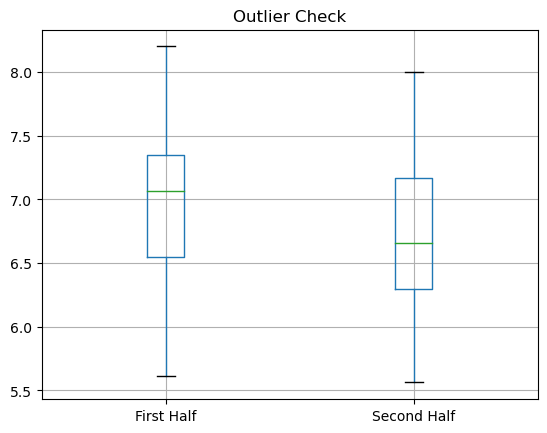

In [81]:
Mood_All_Years.boxplot(column=['First Half', 'Second Half'])
plt.title('Outlier Check')
plt.show()

Visually things look good, but I'm just going to confirm with a zscore test for any vaues above 3 standard deviations from the mean.

In [82]:
# Z-scores for each month half
Mood_All_Years['zscore_First_Half'] = zscore(Mood_All_Years['First Half'])
Mood_All_Years['zscore_Second_Half'] = zscore(Mood_All_Years['Second Half'])

# FInding outliers (absolute z-score > 3)
Mood_All_Years['Outlier_First_Half'] = abs(Mood_All_Years['zscore_First_Half']) > 3
Mood_All_Years['Outlier_Second_Half'] = abs(Mood_All_Years['zscore_Second_Half']) > 3

In [83]:
Mood_All_Years

,Month,First Half,Second Half,Year,zscore_First_Half,zscore_Second_Half,Outlier_First_Half,Outlier_Second_Half
0,December,7.200000,5.562500,2021,0.370667,-1.830971,False,False
1,November,8.066667,7.533333,2021,1.705300,1.199852,False,False
2,October,8.200000,7.750000,2021,1.910628,1.533050,False,False
3,September,7.785714,8.000000,2021,1.272644,1.917510,False,False
4,April,7.400000,7.285714,2022,0.678659,0.819054,False,False
5,August,6.428571,7.133333,2022,-0.817304,0.584716,False,False
6,December,6.000000,6.062500,2022,-1.477288,-1.062052,False,False
7,February,7.466667,6.615385,2022,0.781323,-0.211805,False,False
8,January,5.615385,7.400000,2022,-2.069581,0.994807,False,False
9,July,7.000000,7.071429,2022,0.062674,0.489517,False,False


Looks good. Now checking for the normality assumption.

In [84]:
Mood_All_Years['Difference'] = Mood_All_Years['First Half'] - Mood_All_Years['Second Half']

In [85]:
# S-W Test, if the p-value is bigger than 0.05 the findings are not statistically significant and the data meets the assumption.
stat, p_value = shapiro(Mood_All_Years['Difference'])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9625254273414612, p-value: 0.3995037376880646


#### 4.4.3 Paired T-Test

Great! Data meets the normality assumption. Now we can carry out the paired t-test.

In [86]:
# Paired t-test
t_stat, p_value = ttest_rel(Mood_All_Years['First Half'], Mood_All_Years['Second Half'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.5469834875954502
P-value: 0.13350957944426997


Okay, well since our hypothesis was that there will be a difference between my mood on the first versus second half of the month, and the p-value is non-significant, we have to fail to reject the null hypothesis. There's no evidence supporting the experimental hypothesis of my mood being better in the first half. It was good to check. 

## 5. Correlation Between Habits

### 5.1 Correlations Between Habits and Mood Over Months

In [87]:
Proportions_All_Years = pd.concat([proportions_2021, proportions_2022, proportions_2023], axis=0, ignore_index=True)

Text(0.5, 1.0, 'Correlation Heatmap of Habits')

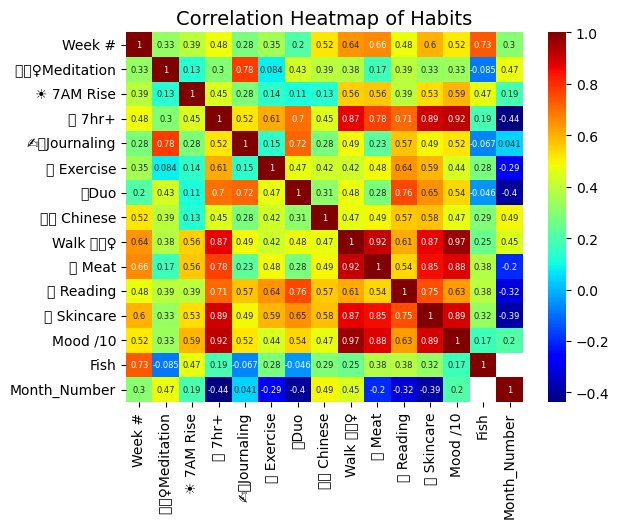

In [88]:
habit_corr = Proportions_All_Years.corr()
sns.heatmap(data = habit_corr, cmap = 'jet', annot=True, annot_kws={'size': 6});
plt.title('Correlation Heatmap of Habits', fontsize=14)

Okay, so it seems like I have a connection between eating more fish and doing more enrichment activities, like doing mosaics or going to a museum. It might be because I tend to order fish if i'm out, and I do eat out more if I'm doing more 'enrichment' activities, even if it's ordering in. 

There's also a high correlation between Enrichment and doing BehSci Research and reading up on new events - makes sense because I tend to do this more when I feel I have time to myself. 

There was also a correlation between doing my reading and duolingo which makes sense because I used to do both as part of my morning routine around 2021-22, but given that it's 2024 when I'm analysing this I must disclose the duolingo has heavily decreased so we're unlikely to see as high a correlation with it in 2024. 

So the correlations just tend to be between activities that I pair often in my routines... of course. So meditation and journalling have a pretty strong correlation as well.

I do find it interesting that there's a pretty strong negative correlation between my mood and the week number, which I noticed in the visualisations earlier as well. It seems like 2021 and 2022 were overall just happier years for me than 2023. That makes sense, since it was the year  was finishing my masters in Warwick and living in Coventry - a massive difference from the daily beauty of Bath. It, and everything associated with the difference, makes sense for this difference. 

Now let's see if the correlations are significant or not between mood and the different habits. Since we're working with mood (which is continuous) and habits I did (which are binary), I'll need a point-biserial correlation.

### 5.2 Correlations Between Habits and Mood On a Daily 

In [89]:
cleaned_habits_binary = habits_no_duplicates.replace({'Yes': 1, 'No': 0, pd.NA: 0}, inplace=False)

In [90]:
cleaned_habits_binary_corr_columns = cleaned_habits_binary[habit_columns]
cleaned_habits_binary_corr_columns['Mood /10'] = cleaned_habits_binary['Mood /10']

In [91]:
cleaned_habits_binary_corr_columns

,🧴 Skincare,Walk 🚶🏻‍♀️,🌙 7hr+,🗼Duo,🍗 Meat,📘 Reading,🇨🇳 Chinese,✍🏼Journaling,🛼 Exercise,☀️ 7AM Rise,🧘🏽‍♀️Meditation,Mood /10
0,1,1,1,1,1,1,1,0,1,0,0,8.0
2,1,1,1,1,1,1,1,0,1,0,0,9.0
4,1,1,1,1,0,1,1,0,0,0,0,4.0
6,0,0,1,1,1,1,1,0,0,0,0,4.0
10,1,1,1,1,1,1,1,0,1,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,1,1,0,1,0,1,0,0,0,0,6.0
876,1,1,0,0,1,0,1,0,0,0,0,6.0
877,1,1,1,0,1,0,0,0,0,0,0,6.0
878,1,1,1,0,1,0,0,0,0,0,0,7.0


Now can run the correlation.

In [92]:
results = []

for col in habit_columns:
    # Spearman's corr between binary habits and mood
    correlation_coefficient, p_value = spearmanr(cleaned_habits_binary_corr_columns[col], cleaned_habits_binary_corr_columns['Mood /10'])
    
    # Formatting p-value to 3 dp
    formatted_p_value = "{:.3f}".format(p_value)
    
    # Bold p-value if it's less than 0.05 (statistically significant)
    formatted_p_value = "\033[1m" + formatted_p_value + "\033[0m" if p_value < 0.05 else formatted_p_value
    
    results.append([col, correlation_coefficient, formatted_p_value])

print(tabulate(results, headers=['Habit Column', 'Correlation Coefficient', 'P-value'], tablefmt='pretty'))

+-----------------+-------------------------+---------+
|  Habit Column   | Correlation Coefficient | P-value |
+-----------------+-------------------------+---------+
|   🧴 Skincare   |  0.023832122024956055   |  0.490  |
|   Walk 🚶🏻‍♀️    |   0.12137171856479344   |  0.000  |
|     🌙 7hr+     |  -0.001313270524522544  |  0.970  |
|      🗼Duo      |  0.034012975300035275   |  0.325  |
|     🍗 Meat     |  0.029305896443985156   |  0.396  |
|   📘 Reading    |  -0.03930044568710923   |  0.255  |
|   🇨🇳 Chinese    |  -0.08392476899764369   |  0.015  |
|  ✍🏼Journaling  |  0.0068810047602967115  |  0.842  |
|   🛼 Exercise   |  0.0035170766325591787  |  0.919  |
|   ☀️ 7AM Rise    |   0.08118589079773235   |  0.019  |
| 🧘🏽‍♀️Meditation |  0.018386924009287382   |  0.595  |
+-----------------+-------------------------+---------+


Even though there are a bunch of statistically significant correlations, the coefficient is smaller than an absolute value of 0.2 which suggests whatever relatonships there are are quite weak.

## 6 Conclusions

Overall this was mainly a fun exploratory analysi (EDA) I could do with the habit tracking data I've collected over the years. I'm planning on continuining to collect more data since it takes a couple minutes each day, and look forward to visualising the seasons and months of my life as recorded by my habit tracker. 

I might be adding a few more habits or stop tracking other habits I already have depending on how my prioritires and goals change over time, but that's because the main reason I track my habits is that dopamine rush or flood of regret when I can or have to 'tick' things off, and as a way of looking back at different weeks in my life in conjunction to my weekly planner record. It does make it a bit difficult to really understand how much I am or not doing -since the moment of starting or re-starting- the habit, so if I get a few more like this the next time I do an exploratory gander then I'll look at averaging out based on different time periods. 

Unfortunately, I found that when correlations were identified between habits, it's usually because I do them in a sequence rather than anything else, which I did think might cloud any unknown patterns. 

That said, there were a few trends that were interesting to pick up and I discovered a few curious patterns in my life I didn't notice before, for example how my average mood decreased over the years from the last half of 2021 to 2023. My mood also tends to drop during the festive season but increase for autumn/start of winter (September-November) and spring time. My favorite season is autumn, and I do like Winter, so this is interesting to see especially as I would rank Spring my least favorite season. When actually, based on my mood tracking, it's actually the season during which I tend to be the happiest. Interesting.

I noticed that I also have happened to start reading and eating more fish and meat, and I'm looking to reverse this trend and be more creative with using alternative sources of protein. Skincare is one of the habits I did least frequently (honestly, it does show), it just seems like too much time to go through the whole routine a lot of nights, so I tend to not do it at all if I feel like I can't do the whole routine. A bit of that black and white thinking slipping past. Awareness is the first step to improvement!
